<b><h1 style="color: red">Gender classification</h1></b>

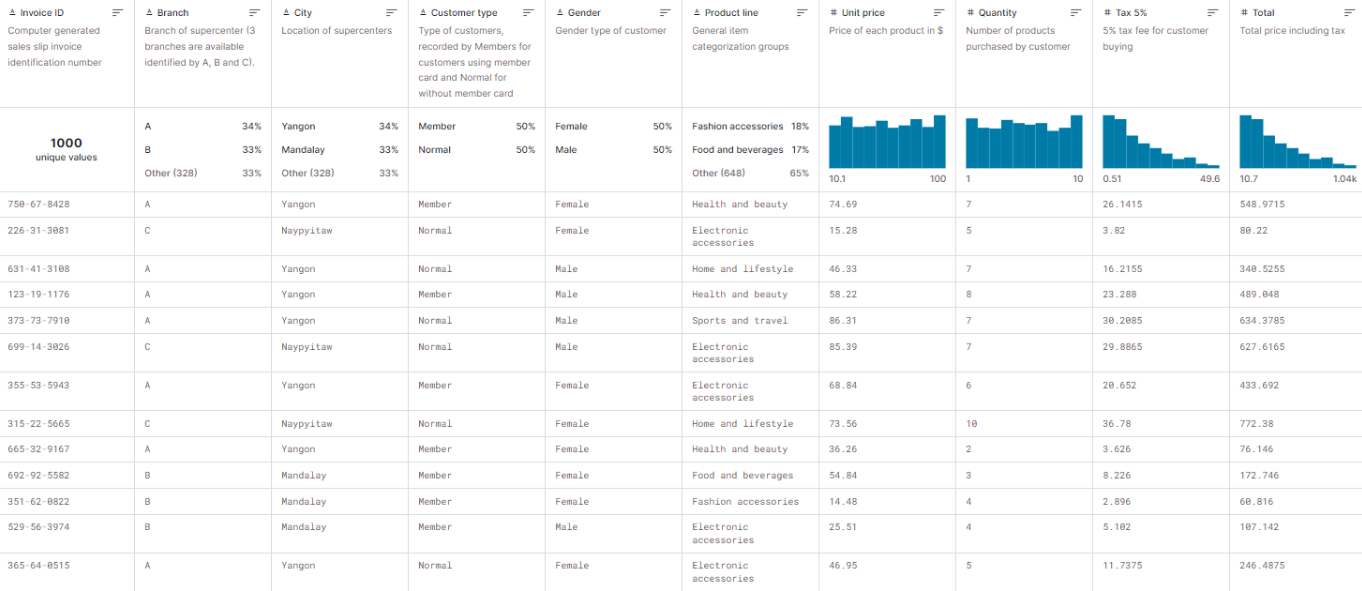

### 1. Preprocessing

In [228]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Column keys: 
['Invoice ID' 'Branch' 'City' 'Customer type' 'Gender' 'Product line'
 'Unit price' 'Quantity' 'Tax 5%' 'Total' 'Date' 'Time' 'Payment' 'cogs'
 'gross margin percentage' 'gross income' 'Rating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 no

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

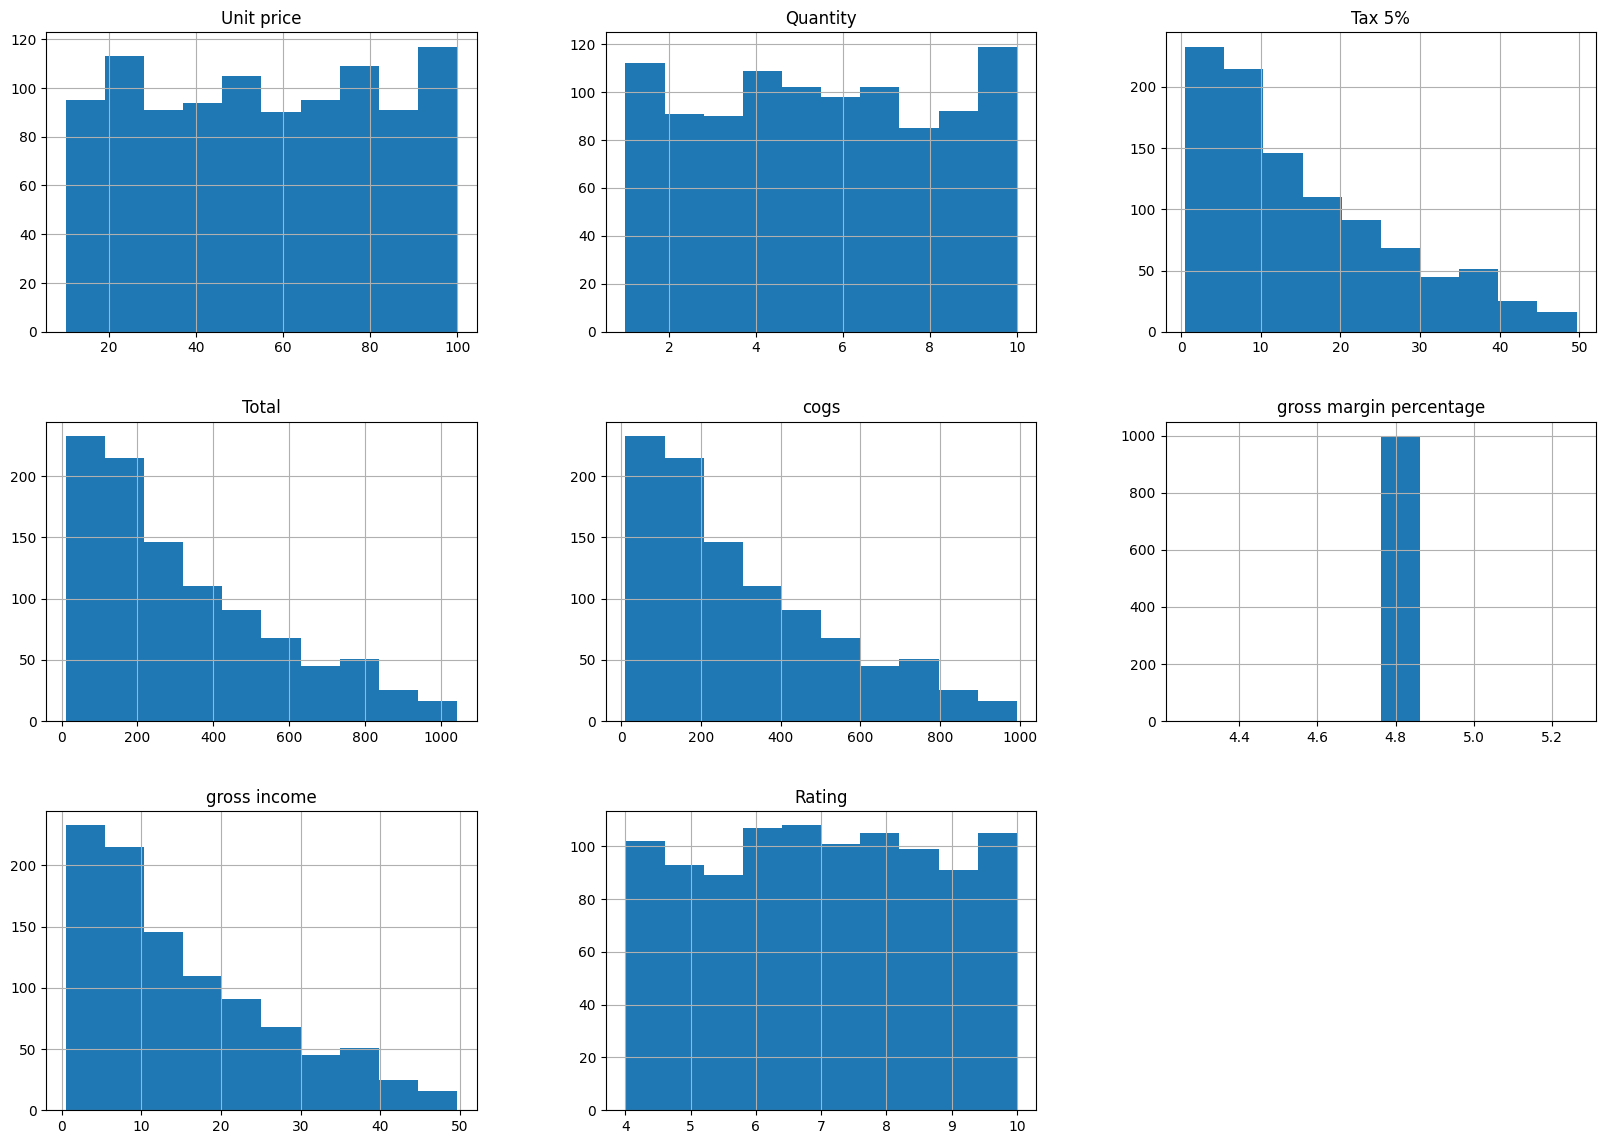

In [229]:
data_frame = pd.read_csv("../Resources/supermarket-sales.csv")

print(f"Column keys: \n{data_frame.keys().values}")

data_frame.info()
data_frame.describe()
data_frame.hist(figsize=(20, 14))

In [230]:
y = data_frame["Gender"].values
data_frame.drop("Gender", axis=1)
X = data_frame.iloc[:, :].values

# Label encoding categorical dependent variable y:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Label Encoding categorical independent variables from X:
for value, i in zip(X[0], range(len(X[0]))):
    if type(value) is str:
        X[:, i] = label_encoder.fit_transform(X[:, i])
        
print(f"X: \n{X},\ny: \n{y}")

X: 
[[814 0 2 ... 4.761904762 26.1415 9.1]
 [142 2 1 ... 4.761904762 3.82 9.6]
 [653 0 2 ... 4.761904762 16.2155 7.4]
 ...
 [767 0 2 ... 4.761904762 1.592 7.7]
 [308 0 2 ... 4.761904762 3.291 4.1]
 [935 0 2 ... 4.761904762 30.919 6.6]],
y: 
[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 0 1 

### 2. Splitting data into training and testing data:

In [231]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, shuffle=True)

print(f"X_train's shape: {X_train.shape}")
print(f"y_train's shape: {y_train.shape}")
print(f"X_test's shape: {X_test.shape}")
print(f"y_test's shape: {y_test.shape}\n")

print(f"Data: -----------------\n")
print(f"X_train: {X_train},\ny_train: {y_train}, \nX_test: {X_test}, \ny_test: {y_test}")

X_train's shape: (700, 17)
y_train's shape: (700,)
X_test's shape: (300, 17)
y_test's shape: (300,)

Data: -----------------

X_train: [[28 0 2 ... 4.761904762 13.8135 4.2]
 [205 2 1 ... 4.761904762 48.605 8.7]
 [754 2 1 ... 4.761904762 24.665 9.4]
 ...
 [451 1 0 ... 4.761904762 12.06 5.8]
 [395 1 0 ... 4.761904762 14.955 4.7]
 [971 0 2 ... 4.761904762 7.693 5.1]],
y_train: [0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 

### 3. Training models:
- Logistic Regression (Linear Method),
- Support Vector Machine (Linear Method),
- K-Neighbors Classifier (Non-Linear Method),
- Naive Bayes (Non-Linear Method),
- Decision Tree Classifier (Non-Linear Method),
- Random Forest Classifier (Ensemble, Non-Linear Method),
- Extra Tress Classifier (Ensemble, Non-Linear Method).


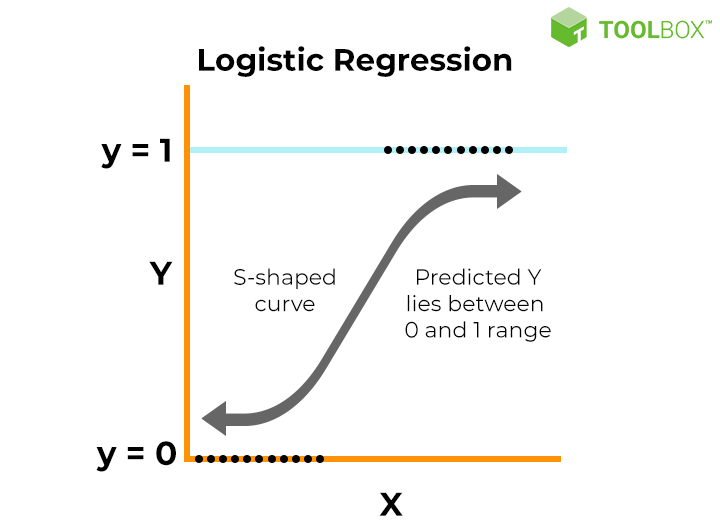
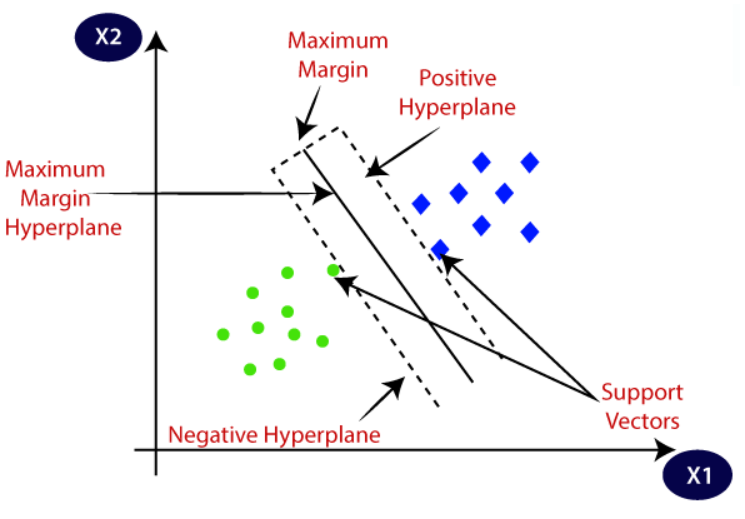
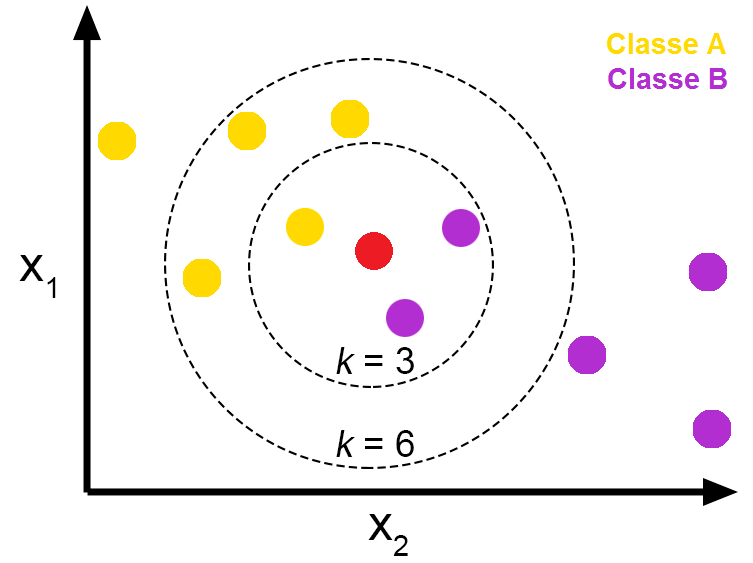
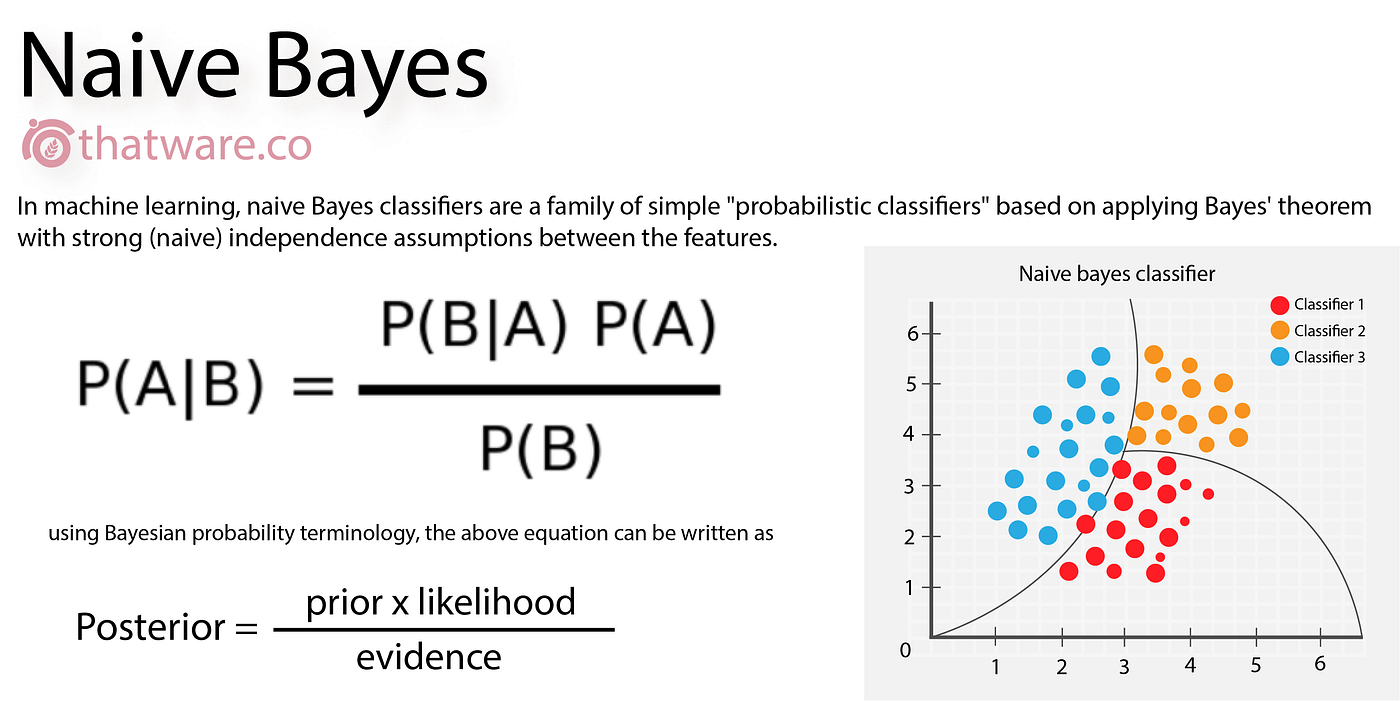
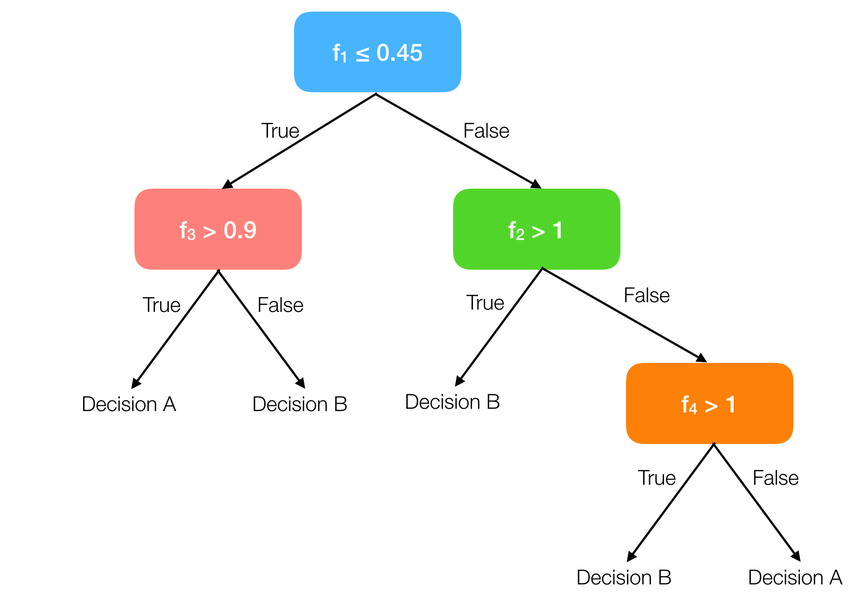
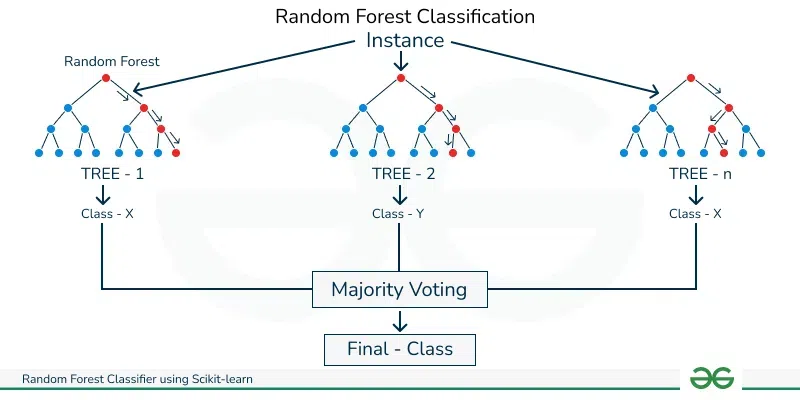
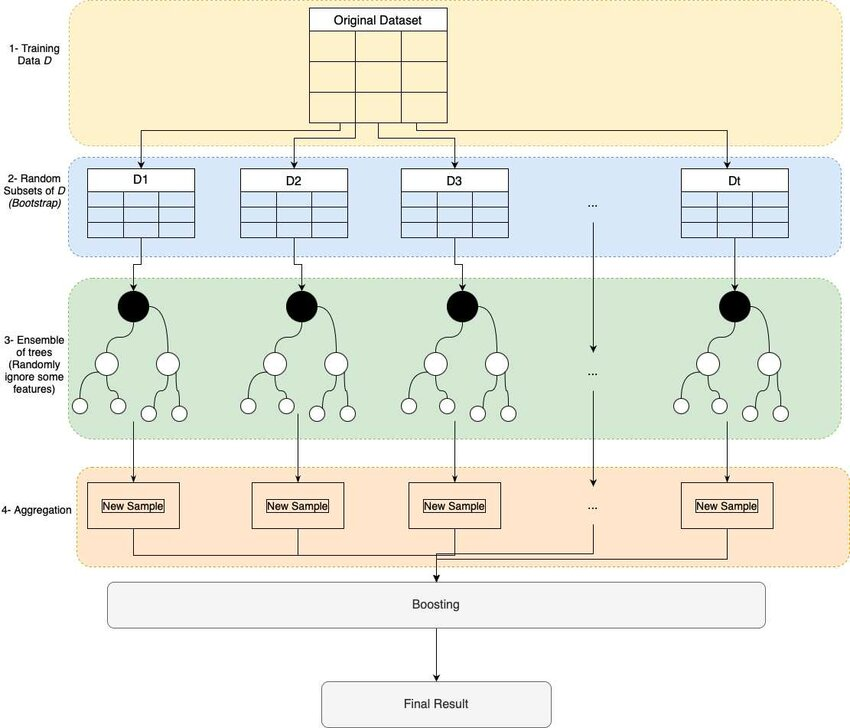

In [232]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
y_predicted = logistic_regression_classifier.predict(X_test)

print(f"Classication report: \n{classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{logistic_regression_classifier.score(X_train, y_train) * 100}")
print(f"Accuracy score: \n{accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

Classication report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion matrix: 
[[140   0]
 [  0 160]]
Training score: 
100.0
Accuracy score: 
1.0

y_predicted: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 0

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [233]:
from sklearn.svm import LinearSVC

svc_classifier = LinearSVC()
svc_classifier.fit(X_train, y_train)
y_predicted = svc_classifier.predict(X_test)

print(f"Classification report: {classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{svc_classifier.score(X_train, y_train)}")
print(f"Accuracy score: \n{accuracy_score(y_test, y_predicted)}")
print(f"y_test: {y_test}")
print(f"y_predicted: {y_predicted}")

Classification report:               precision    recall  f1-score   support

           0       0.74      0.97      0.84       140
           1       0.97      0.71      0.82       160

    accuracy                           0.83       300
   macro avg       0.85      0.84      0.83       300
weighted avg       0.86      0.83      0.83       300

Confusion matrix: 
[[136   4]
 [ 47 113]]
Training score: 
0.8242857142857143
Accuracy score: 
0.83
y_test: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [234]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=7)
k_neighbors_classifier.fit(X_train, y_train)
y_predicted = k_neighbors_classifier.predict(X_test)

print(f"Classification report: {classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{k_neighbors_classifier.score(X_train, y_train)}")
print(f"Accuracy score: {accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

Classification report:               precision    recall  f1-score   support

           0       0.44      0.51      0.47       140
           1       0.50      0.44      0.47       160

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300

Confusion matrix: 
[[71 69]
 [90 70]]
Training score: 
0.65
Accuracy score: 0.47

y_predicted: [0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0

In [235]:
from sklearn.naive_bayes import GaussianNB

gaussian_naive_bayes_classifier = GaussianNB()
gaussian_naive_bayes_classifier.fit(X_train, y_train)

y_predicted = gaussian_naive_bayes_classifier.predict(X_test)

print(f"classification_report: \n{classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Accuracy score: {accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion matrix: 
[[140   0]
 [  0 160]]
Accuracy score: 1.0

y_predicted: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1

In [236]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(
    max_depth=8, random_state=120, criterion='entropy'
)
decision_tree_classifier.fit(X_train, y_train)

y_predicted = decision_tree_classifier.predict(X_test)

print(f"Classification report: \n{classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{decision_tree_classifier.score(X_train, y_train)*100}")
print(f"Accuracy score: {accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion matrix: 
[[140   0]
 [  0 160]]
Training score: 
100.0
Accuracy score: 1.0

y_predicted: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 

In [237]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

y_predicted = random_forest_classifier.predict(X_test)

print(f"Classification report: \n{classification_report(y_test, y_predicted)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{random_forest_classifier.score(X_train, y_train)*100}")
print(f"Accuracy score: {accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix: 
[[140   0]
 [  0 160]]
Training score: 
100.0
Accuracy score: 1.0

y_predicted: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 

In [238]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tress_classifier = ExtraTreesClassifier(
    n_estimators=100, random_state=0
)
extra_tress_classifier.fit(X_train, y_train)
y_predicted = extra_tress_classifier.predict(X_test)

print(f"Classification report: \n{classification_report(y_test, y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predicted)}")
print(f"Training score: \n{extra_tress_classifier.score(X_train, y_train)*100}")
print(f"Accuracy score: {accuracy_score(y_test, y_predicted)}\n")
print(f"y_predicted: {y_predicted}")
print(f"y_test: {y_test}")

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion matrix: 
[[140   0]
 [  0 160]]
Training score: 
100.0
Accuracy score: 1.0

y_predicted: [0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 